In [8]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv("fraud_oracle.csv")

#removing unrelated variables from the data set
updated_ds = dataset.drop(["Month","WeekOfMonth","DayOfWeek", "Make", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed", 
                   "RepNumber", "Deductible", "AgeOfPolicyHolder","PastNumberOfClaims","PolicyNumber", "AddressChange_Claim","NumberOfCars","Year"],axis =1)

#drop fetures that identified as unimportant by feature extraction method using R-Studio

updated_ds_new = updated_ds.drop(["AccidentArea", "AgentType", "DriverRating", "NumberOfSuppliments","PoliceReportFiled","VehiclePrice"],axis =1)


# For Days_Policy_Accident it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'more than 30', 'Days_Policy_Accident'] = '31'

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'none', 'Days_Policy_Accident'] = '0'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '8 to 15', 'Days_Policy_Accident'] = '11.5'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '15 to 30', 'Days_Policy_Accident'] = '22.5'

# mean of range 1 t0 7 ->  1+2+3+4+5+6+7/7 = 4 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '1 to 7', 'Days_Policy_Accident'] = '4'


# For Days_Policy_Claim it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'more than 30', 'Days_Policy_Claim'] = '31'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '15 to 30', 'Days_Policy_Claim'] = '22.5'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '8 to 15', 'Days_Policy_Claim'] = '11.5'

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'none', 'Days_Policy_Claim'] = '0'

# For AgeOfVehicle it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '7 years', 'AgeOfVehicle'] = '7'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'more than 7', 'AgeOfVehicle'] = '8'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '6 years', 'AgeOfVehicle'] = '6'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '5 years', 'AgeOfVehicle'] = '5'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'new', 'AgeOfVehicle'] = '0'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '4 years', 'AgeOfVehicle'] = '4'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '3 years', 'AgeOfVehicle'] = '3'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '2 years', 'AgeOfVehicle'] = '2'

# changing datatypes of the dataset as per the above transformations
updated_ds_new['Days_Policy_Accident'] = updated_ds_new['Days_Policy_Accident'].astype('float')
updated_ds_new['Days_Policy_Claim'] = updated_ds_new['Days_Policy_Claim'].astype('float')
updated_ds_new['AgeOfVehicle'] = updated_ds_new['AgeOfVehicle'].astype('float')

updated_ds_new.dtypes

# perform OHE for categorical data 
one_hot_encoded_data = pd.get_dummies(updated_ds_new, columns = ['Sex', 'MaritalStatus','Fault','PolicyType', 'VehicleCategory','WitnessPresent','BasePolicy'])

one_hot_encoded_data.dtypes

Age                                  int64
FraudFound_P                         int64
Days_Policy_Accident               float64
Days_Policy_Claim                  float64
AgeOfVehicle                       float64
Sex_Female                           uint8
Sex_Male                             uint8
MaritalStatus_Divorced               uint8
MaritalStatus_Married                uint8
MaritalStatus_Single                 uint8
MaritalStatus_Widow                  uint8
Fault_Policy Holder                  uint8
Fault_Third Party                    uint8
PolicyType_Sedan - All Perils        uint8
PolicyType_Sedan - Collision         uint8
PolicyType_Sedan - Liability         uint8
PolicyType_Sport - All Perils        uint8
PolicyType_Sport - Collision         uint8
PolicyType_Sport - Liability         uint8
PolicyType_Utility - All Perils      uint8
PolicyType_Utility - Collision       uint8
PolicyType_Utility - Liability       uint8
VehicleCategory_Sedan                uint8
VehicleCate

classes are:  ['0', '1']
ACCURACY OF THE MODEL:  0.9332036316472114
Accuracy: 0.9332036316472114
Confusion Matrix is 
[[4304   40]
 [ 269   13]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4344
           1       0.25      0.05      0.08       282

    accuracy                           0.93      4626
   macro avg       0.59      0.52      0.52      4626
weighted avg       0.90      0.93      0.91      4626



Confusion matrix, without normalization
[[4304   40]
 [ 269   13]]


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


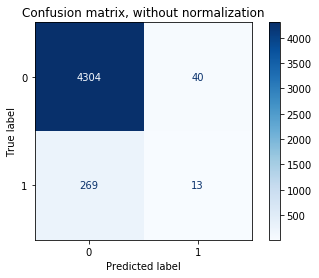

In [3]:
# Applying Rndom Forest for Predict Frauds in Vehicle Insurance Claim
# https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


x = one_hot_encoded_data.drop("FraudFound_P", axis=1).values
y = one_hot_encoded_data["FraudFound_P"].values

class_names = ["0", "1"]
print("classes are: ", class_names)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


classes are:  ['0', '1']
ACCURACY OF THE MODEL:  0.9316904453091224
Accuracy: 0.9316904453091224
Confusion Matrix is 
[[4293   49]
 [ 267   17]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4342
           1       0.26      0.06      0.10       284

    accuracy                           0.93      4626
   macro avg       0.60      0.52      0.53      4626
weighted avg       0.90      0.93      0.91      4626



Confusion matrix, without normalization
[[4293   49]
 [ 267   17]]


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


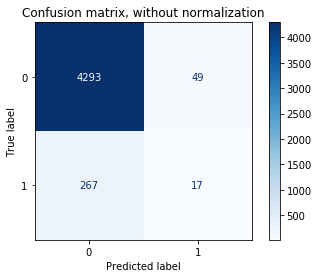

In [7]:
# Applying Rndom Forest for Predict Frauds in Vehicle Insurance Claim
# https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


x = one_hot_encoded_data.drop("FraudFound_P", axis=1).values
y = one_hot_encoded_data["FraudFound_P"].values

class_names = ["0", "1"]
print("classes are: ", class_names)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 50)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


classes are:  ['0', '1']
ACCURACY OF THE MODEL:  0.9249891915261566
Accuracy: 0.9249891915261566
Confusion Matrix is 
[[4276   73]
 [ 274    3]]


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4349
           1       0.04      0.01      0.02       277

    accuracy                           0.92      4626
   macro avg       0.49      0.50      0.49      4626
weighted avg       0.89      0.92      0.90      4626



Confusion matrix, without normalization
[[4276   73]
 [ 274    3]]


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


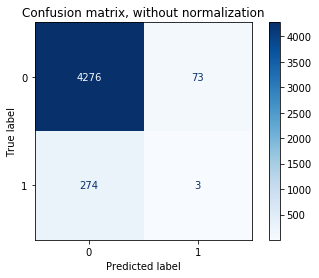

In [9]:
# Applying Rndom Forest for Predict Frauds in Vehicle Insurance Claim
# https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


x = one_hot_encoded_data.drop("FraudFound_P", axis=1).values
y = one_hot_encoded_data["FraudFound_P"].values

class_names = ["0", "1"]
print("classes are: ", class_names)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
